# Análise de investimentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance 

yfinance.pdr_override()
end = "2022-12-31"

In [2]:
procter_and_gamble = pdr.get_data_yahoo('PG', start='1995-01-01', end=end)

# opção do csv baixado da página a yahoo
# procter_and_gamble = pd.read_csv('../data/PG.csv')

[*********************100%%**********************]  1 of 1 completed


In [3]:
procter_and_gamble.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.626419,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.565283,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.458298,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.473585,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.443015,1795200


In [4]:
procter_and_gamble.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,152.309998,152.919998,151.669998,152.619995,148.841461,3401800
2022-12-27,152.699997,154.320007,152.660004,153.949997,150.138535,4215100
2022-12-28,154.279999,154.649994,151.899994,151.960007,148.197784,4197500
2022-12-29,152.809998,153.240005,152.139999,152.589996,148.812195,3809100
2022-12-30,152.429993,152.679993,150.440002,151.559998,147.807693,4532000


In [5]:
pg = procter_and_gamble[["Adj Close"]].copy().reset_index()
pg['Date'] = pd.to_datetime(pg['Date'])
pg['ano'] = pg.Date.dt.year
pg['mes'] = pg.Date.dt.month
pg = pg[['Date', 'ano', 'mes', 'Adj Close']]

pg

,Date,ano,mes,Adj Close
0,1995-01-03,1995,1,7.626419
1,1995-01-04,1995,1,7.565283
2,1995-01-05,1995,1,7.458298
3,1995-01-06,1995,1,7.473585
4,1995-01-09,1995,1,7.443015
...,...,...,...,...
7045,2022-12-23,2022,12,148.841461
7046,2022-12-27,2022,12,150.138535
7047,2022-12-28,2022,12,148.197784
7048,2022-12-29,2022,12,148.812195


## Retorno simples 
Calculado sobre o preço de fechamento

$$\text{retorno simples} = \frac{P_1-P_0}{P_0} = \frac{P_1}{P_0}-1$$ 

In [6]:
pg

,Date,ano,mes,Adj Close
0,1995-01-03,1995,1,7.626419
1,1995-01-04,1995,1,7.565283
2,1995-01-05,1995,1,7.458298
3,1995-01-06,1995,1,7.473585
4,1995-01-09,1995,1,7.443015
...,...,...,...,...
7045,2022-12-23,2022,12,148.841461
7046,2022-12-27,2022,12,150.138535
7047,2022-12-28,2022,12,148.197784
7048,2022-12-29,2022,12,148.812195


In [7]:
pg['retorno_simples'] = (pg['Adj Close']/pg['Adj Close'].shift(1)) - 1

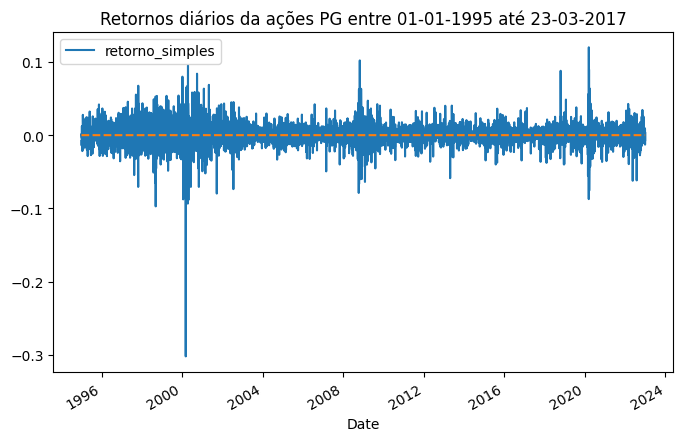

In [8]:
pg[['Date', 'retorno_simples']].plot(x='Date', y='retorno_simples', figsize=(8, 5))
plt.title("Retornos diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

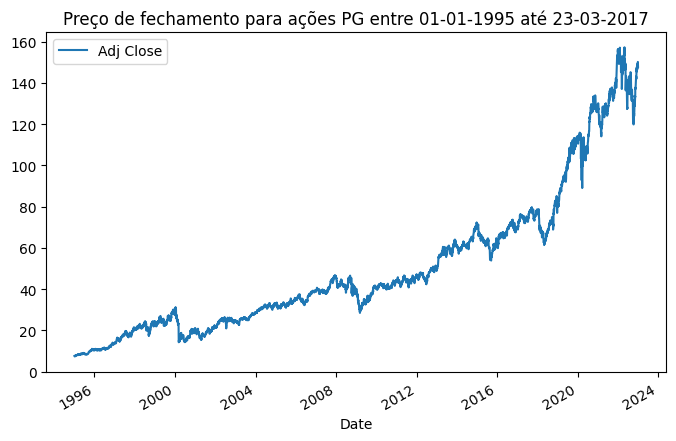

In [9]:
pg[['Date', 'Adj Close']].plot(x='Date', y='Adj Close',figsize=(8, 5))
plt.title("Preço de fechamento para ações PG entre 01-01-1995 até 23-03-2017")
plt.show()

In [10]:
avg_returns = pg['retorno_simples'].mean()
avg_returns

0.0005205994544420181

In [11]:
avg_returns_year = pg['retorno_simples'].mean() * 250
print(f'retorno anual médio {round(avg_returns_year*100, 3)} %')

retorno anual médio 13.015 %


## Retorno logarítmo

Lembrando que fazemos uma análise de um único ativo. Nesse caso é mais interessante analisar o retorno logarítmo.

$$\text{retorno log} = \ln\left(\frac{P_{t}}{P_{t-1}}\right)$$

In [12]:
pg['retorno_log'] = np.log(pg['Adj Close']/pg['Adj Close'].shift(1))

In [13]:
pg

,Date,ano,mes,Adj Close,retorno_simples,retorno_log
0,1995-01-03,1995,1,7.626419,NaN,NaN
1,1995-01-04,1995,1,7.565283,-0.008016,-0.008049
2,1995-01-05,1995,1,7.458298,-0.014142,-0.014242
3,1995-01-06,1995,1,7.473585,0.002050,0.002047
4,1995-01-09,1995,1,7.443015,-0.004090,-0.004099
...,...,...,...,...,...,...
7045,2022-12-23,2022,12,148.841461,0.002825,0.002821
7046,2022-12-27,2022,12,150.138535,0.008714,0.008677
7047,2022-12-28,2022,12,148.197784,-0.012926,-0.013011
7048,2022-12-29,2022,12,148.812195,0.004146,0.004137


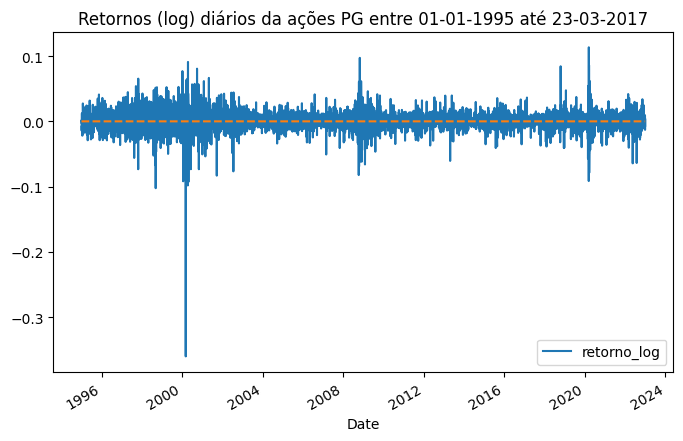

In [14]:
pg[['Date', 'retorno_log']].plot(x='Date', y='retorno_log',figsize=(8, 5))
plt.title("Retornos (log) diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

## Retorno de multiplos investimentos

Vamos considerar um portifólio simples, onde os quatro ativos tem pesos iguais, e calcular as suas respectivas taxas de retorno histórico.

\begin{array}{|c|c|c|}
\hline
\text{Ativo} & \text{Taxa média anual de retorno(\%)} & Peso \\
\hline
\text{P\&G} &   0.318524 & 0.25 \\
\text{MSFT} &  0.153581 & 0.25\\
\text{GE} &  0.116717 & 0.25\\
\text{F} & 0.126224 & 0.25\\
\hline
\end{array}

In [15]:
# portifólio com ações da P&G,Microsoft, Ford, General Electrics
tickers = ["PG", 'MSFT', 'F', 'GE'] 
preco_fechamento = pdr.get_data_yahoo(tickers, start='1995-01-01', end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [16]:
acoes = preco_fechamento.copy()
acoes = acoes.rename(
    columns={'F': 'ford', 
             'GE': 'ge',
             'MSFT': 'microsoft', 
             'PG': 'pg'}
)

acoes.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,3.819578,25.494429,2.332130,7.626419
1995-01-04,3.922349,25.494429,2.349081,7.565283
1995-01-05,3.888092,25.556917,2.310335,7.458298
1995-01-06,3.888092,25.431953,2.349081,7.473585
1995-01-09,3.956604,25.181988,2.334552,7.443015


### Retornos simples - indicados para avaliar uma carteira de investimentos diversificados
 - Normalizando os valores - comparar do mesmo ponto inicial- data base
$$\frac{P_{t}}{P_{0}}*100$$


In [17]:
acoes.iloc[0]

ford          3.819578
ge           25.494429
microsoft     2.332130
pg            7.626419
Name: 1995-01-03 00:00:00, dtype: float64

In [18]:
acoes = (acoes/acoes.iloc[0])*100

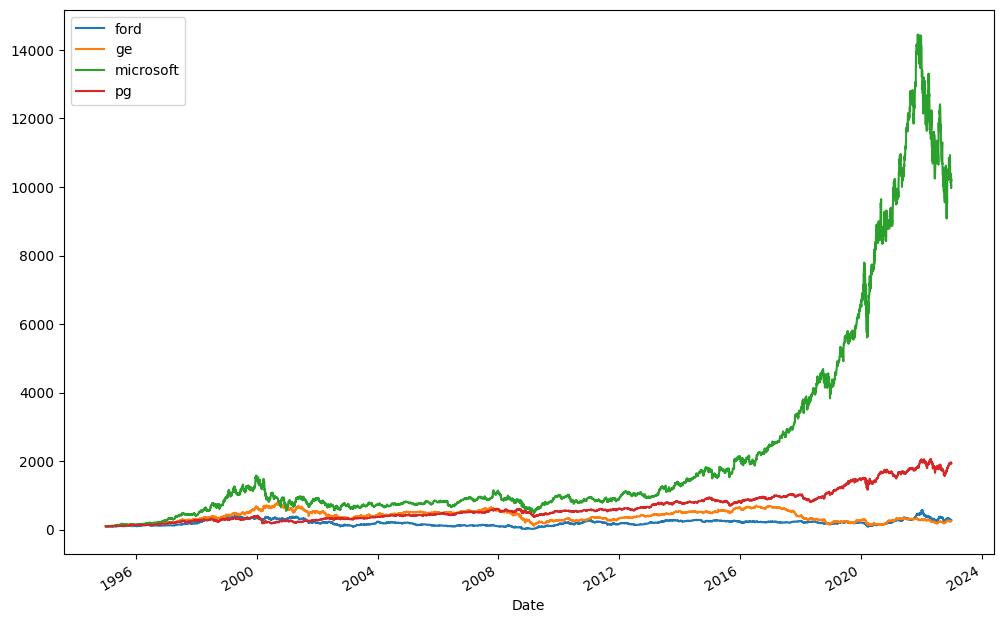

In [19]:
acoes.plot(figsize=(12, 8))
plt.show()

In [20]:
# retorno simples para um portifólio
retornos = (acoes/acoes.shift(1))-1

In [21]:
retornos.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026906,0.000000,0.007268,-0.008016
1995-01-05,-0.008734,0.002451,-0.016494,-0.014142
1995-01-06,0.000000,-0.004890,0.016771,0.002050
1995-01-09,0.017621,-0.009829,-0.006185,-0.004090


In [22]:
pesos = np.array(4*[0.25])
pesos

array([0.25, 0.25, 0.25, 0.25])

In [23]:
# estimando o retorno anual médio
retorno_anual = retornos.mean() *250
retorno_anual = retorno_anual.reset_index().rename(
    columns={'index':'ativo',
             0:'retorno médio anual'
})

retorno_anual

,ativo,retorno médio anual
0,ford,0.117141
1,ge,0.084958
2,microsoft,0.213434
3,pg,0.130150


In [24]:
print(f"""Retorno anual da carteira de investimentos com pesos iguais
{round(np.dot(retorno_anual['retorno médio anual'], pesos) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos iguais
13.642 %


In [25]:
pesos_2 = np.array([0.4,0.4, 0.15, 0.05])
print(f"""Retorno anual da carteira de investimentos com pesos diferentes
{round(np.dot(retorno_anual['retorno médio anual'], pesos_2) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos diferentes
11.936 %


# Índices de ações- calculando taxas de retorno desses indices

In [26]:
# S&P500, NASDAQ, indice alemão DAX, footsie
index_tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

indices = pdr.get_data_yahoo(index_tickers, start='1997-01-01', end=end)['Adj Close']
indices = indices.rename(
    columns={'^GSPC': 'S&P500',
             '^IXIC': 'NASDAQ',
             '^GDAXI': 'DAX',
             '^FTSE': 'Footsie'}
)

[*********************100%%**********************]  4 of 4 completed


In [27]:
indices.head()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
1997-01-02,4057.399902,2820.810059,737.010010,1280.699951
1997-01-03,4089.500000,2863.260010,748.030029,1310.680054
1997-01-06,4106.500000,2890.199951,747.650024,1316.400024
1997-01-07,4078.800049,2876.340088,753.229980,1327.729980
1997-01-08,4087.500000,2904.080078,748.409973,1320.349976


In [28]:
indices.tail()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
2022-12-23,7473.000000,13940.929688,3844.820068,10497.860352
2022-12-27,NaN,13995.099609,3829.250000,10353.230469
2022-12-28,7497.200195,13925.599609,3783.219971,10213.290039
2022-12-29,7512.700195,14071.719727,3849.280029,10478.089844
2022-12-30,7451.700195,13923.589844,3839.500000,10466.480469


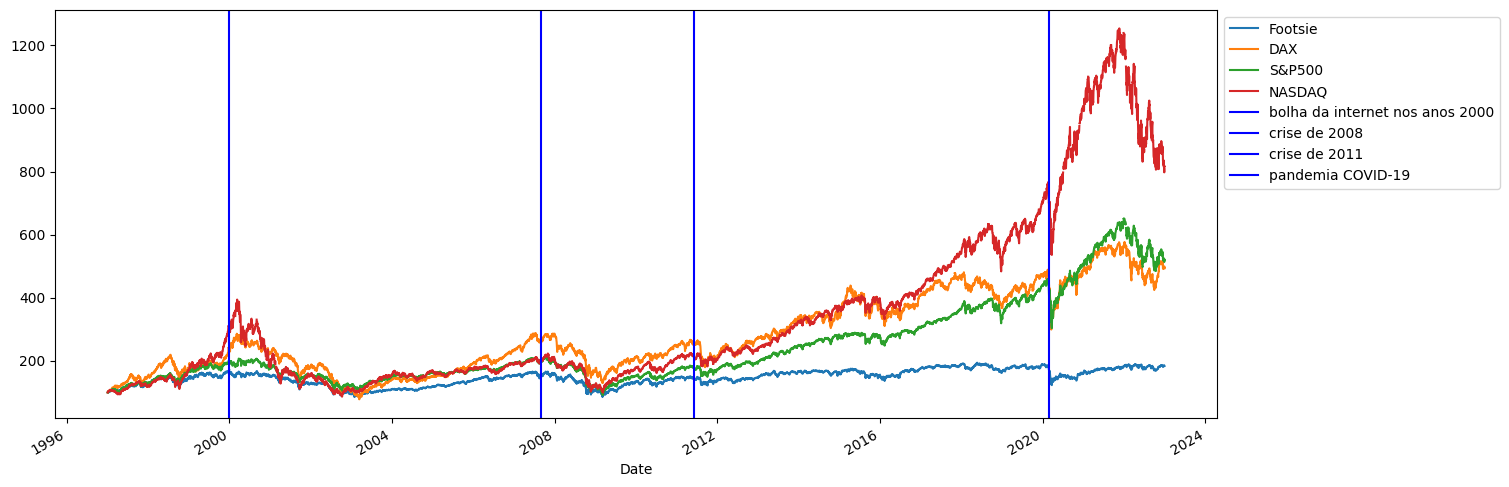

In [29]:
# normalizando para o valor base
(100*(indices/indices.iloc[0])).plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2000-01-01"), color='b', label='bolha da internet nos anos 2000')
plt.axvline(x=pd.to_datetime("2007-08-30"), color='b', label='crise de 2008')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='b', label='crise de 2011')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='b', label='pandemia COVID-19')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

In [30]:
# retornos
retorno_indices = indices/indices.shift(1)-1
retorno_indices.tail()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
2022-12-23,0.000495,0.001930,0.005868,0.002075
2022-12-27,NaN,0.003886,-0.004050,-0.013777
2022-12-28,NaN,-0.004966,-0.012021,-0.013517
2022-12-29,0.002067,0.010493,0.017461,0.025927
2022-12-30,-0.008120,-0.010527,-0.002541,-0.001108


In [31]:
# Taxas positivas de retornos
retorno_anual_indices = retorno_indices.mean()*250
retorno_anual_indices = retorno_anual_indices.reset_index().rename(
    columns={'index': 'ativo',
             0: 'retorno anual médio'})

retorno_anual_indices

,ativo,retorno anual médio
0,Footsie,0.034550
1,DAX,0.071946
2,S&P500,0.083116
3,NASDAQ,0.111572


# Comparando o preço de fechamento de uma ação com os indices de mercado

In [32]:
tickers = ['PG', '^GSPC', '^DJI']

indices_comparados = pdr.get_data_yahoo(tickers, start='1997-01-01', end=end)['Adj Close']
indices_comparados = indices_comparados.rename(
    columns={'^GSPC': 'S&P500',
             '^DJI': 'DowJones'}
)

[*********************100%%**********************]  3 of 3 completed


In [33]:
indices_comparados.tail()

,PG,DowJones,S&P500
Date,,,
2022-12-23,148.841461,33203.929688,3844.820068
2022-12-27,150.138535,33241.558594,3829.250000
2022-12-28,148.197800,32875.710938,3783.219971
2022-12-29,148.812195,33220.800781,3849.280029
2022-12-30,147.807693,33147.250000,3839.500000


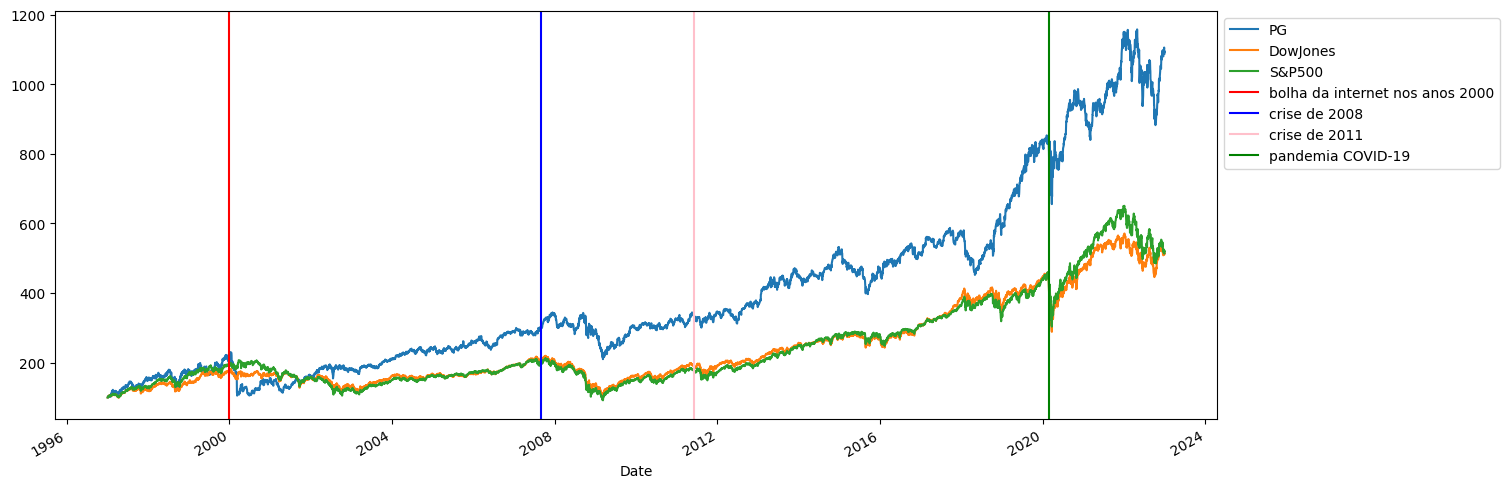

In [34]:
# normalizando para o valor base
indices_comparados = 100*(indices_comparados/indices_comparados.iloc[0])
                      
indices_comparados.plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2000-01-01"), color='red', label='bolha da internet nos anos 2000')
plt.axvline(x=pd.to_datetime("2007-08-30"), color='b', label='crise de 2008')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='pink', label='crise de 2011')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='green', label='pandemia COVID-19')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

In [35]:
indices_comparados

,PG,DowJones,S&P500
Date,,,
1997-01-02,100.000000,100.000000,100.000000
1997-01-03,101.641328,101.577024,101.495233
1997-01-06,102.344639,101.935431,101.443673
1997-01-07,104.220392,102.455105,102.200780
1997-01-08,102.344639,101.660689,101.546785
...,...,...,...
2022-12-23,1096.079206,515.389678,521.678134
2022-12-27,1105.630947,515.973752,519.565535
2022-12-28,1091.339236,510.295084,513.320026


# Calculando o risco de uma ação

In [36]:
# comparar os históricos e o risco entre dois ativos de mesmo negócio Beiersdorf e P&G
tickers = ['PG', 'BEI.DE']

dados_hist = pdr.get_data_yahoo(tickers, start='2007-01-01', end="2022-12-31")['Adj Close']
dados_hist = dados_hist.rename(
    columns={'PG': 'P&G',
             'BEI.DE': 'Beiersdorf'}
)

[*********************100%%**********************]  2 of 2 completed


In [37]:
dados_hist.head()

,Beiersdorf,P&G
Date,,
2007-01-02,39.697182,NaN
2007-01-03,39.784256,39.577751
2007-01-04,40.045471,39.277275
2007-01-05,39.222229,38.939995
2007-01-08,39.230148,39.025860


In [38]:
dados_hist.tail()

,Beiersdorf,P&G
Date,,
2022-12-23,105.788757,148.841446
2022-12-27,106.683594,150.138535
2022-12-28,105.937897,148.197800
2022-12-29,106.832726,148.812195
2022-12-30,106.584160,147.807693


In [39]:
dados_hist = dados_hist.dropna()

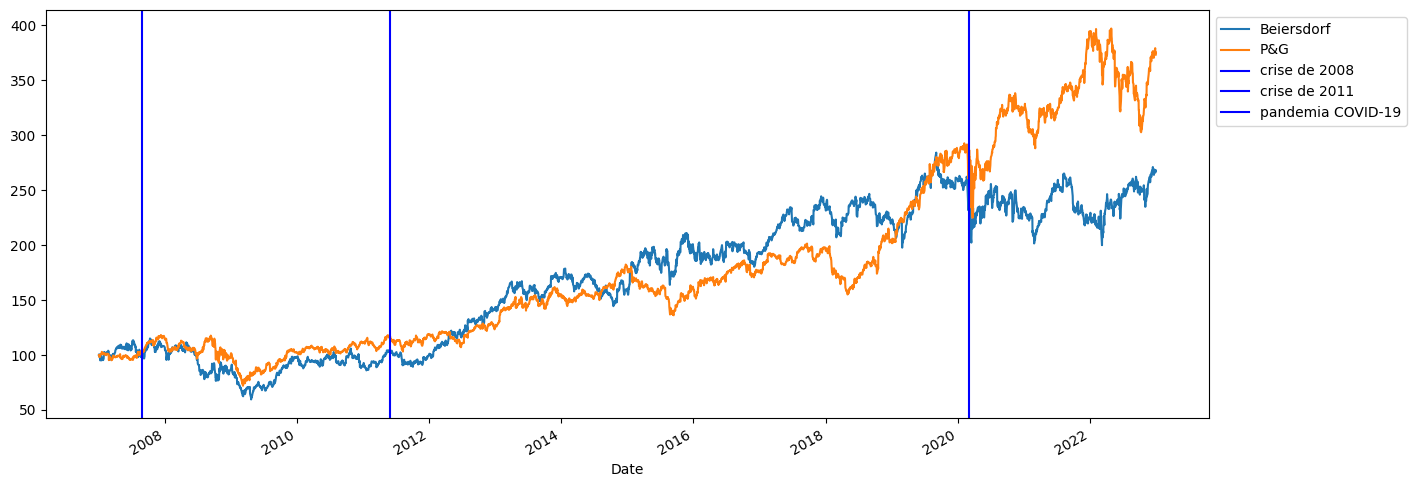

In [40]:
# normalizando
(100*(dados_hist/dados_hist.iloc[0])).plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2007-08-30"), color='b', label='crise de 2008')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='b', label='crise de 2011')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='b', label='pandemia COVID-19')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

### Calculando risco

In [41]:
sec_returns = np.log(dados_hist/dados_hist.shift(1))

In [42]:
# media anual
avg_sec_returns = (sec_returns.mean() * 250).reset_index().rename(
    columns={'index': 'ativo',
             0: 'media anual de retorno'})
avg_sec_returns

,ativo,media anual de retorno
0,Beiersdorf,0.062229
1,P&G,0.083206


In [43]:
# risco - calculao do desvio padrão
risco = ((sec_returns.std() * 250)**0.5).reset_index().rename(
    columns={'index': 'ativo',
             0: 'risco'})
risco

,ativo,risco
0,Beiersdorf,1.860000
1,P&G,1.729692


# Covariancia e Correlação 

$$
cov = \begin{pmatrix}
\sigma_{11}^2 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma_{22}^2 & \ldots & \sigma_{2n}\\
\vdots & \vdots  & \ddots  &  \vdots \\
\sigma_{m1} & \sigma_{m2} & \ldots & \sigma_{mn}^2
\end{pmatrix}
$$

In [44]:
PG_var = sec_returns['P&G'].var()
PG_var

0.0001432172005641094

In [45]:
PG_var = sec_returns['P&G'].var() * 250
PG_var

0.035804300141027354

In [46]:
beiersdorf_var = sec_returns['Beiersdorf'].var()
beiersdorf_var 

0.00019150120785952718

In [47]:
beiersdorf_var = sec_returns['Beiersdorf'].var() * 250
beiersdorf_var 

0.047875301964881795

In [48]:
covariancia = sec_returns.cov()
covariancia

,Beiersdorf,P&G
Beiersdorf,0.000192,0.000045
P&G,0.000045,0.000143


In [49]:
covariancia_anual = sec_returns.cov() * 250
covariancia_anual

,Beiersdorf,P&G
Beiersdorf,0.047875,0.011345
P&G,0.011345,0.035804


In [50]:
correlacao = sec_returns.corr()
correlacao

,Beiersdorf,P&G
Beiersdorf,1.000000,0.274017
P&G,0.274017,1.000000


In [51]:
100_000_000_000

100000000000

## Calculando risco de um portifólio
- 1 portifólio com pesos iguais
$$\bold{w}^{T} \cdot \bold{\sigma}_{1, 2} \cdot \bold{w}$$

In [53]:
weights = np.array([0.5, 0.5])

In [59]:
# variância do portifólio
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() *250, weights))
print("Variância da carteira: ", pfolio_var)

Variância da carteira:  0.026592350599648044


In [60]:
#volatilidade
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() *250, weights)))**0.5

print("Volatilidade da carteira: ", pfolio_vol*100, "%")


Volatilidade da carteira:  16.30716118754213 %
